# Tests

In [19]:
%display latex
import sys

sys.path.insert(0, "/home/twright/Documents/PhD/Notebooks")

from contextlib import contextmanager
import sys, os

@contextmanager
def suppress_stdout():
    with open(os.devnull, "w") as devnull:
        old_stdout = sys.stdout
        sys.stdout = devnull
        try:  
            yield
        finally:
            sys.stdout = old_stdout
            
            
import warnings
            
@contextmanager
def suppress_warnings():
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        yield

## Example 1: Simple

In [20]:
from flowstar.reachability import Reach
from flowstar.poly import Poly
from lbuc import *

In [21]:
R.<x,y> = RIF[]

In [22]:
system = System(
    R,
    (x,y),
    [(4,5), (1,2)],
    [
        -y,
        x,
    ],
)

In [23]:
system.y

(-y, x)

In [24]:
def mval(x, y):
    val = RIF((var("x")^2 + var("y")^2)({var("x"): x, var("y"): y}))
    if val.upper() < 4:
        return 1
    elif val.lower() > 4:
        return -1
    else:
        return 0

In [25]:
from matplotlib.colors import LinearSegmentedColormap

In [26]:
def f(m):
    return 3*((m + 1)/2)


def finv(m):
    return 2*m/3 - 1

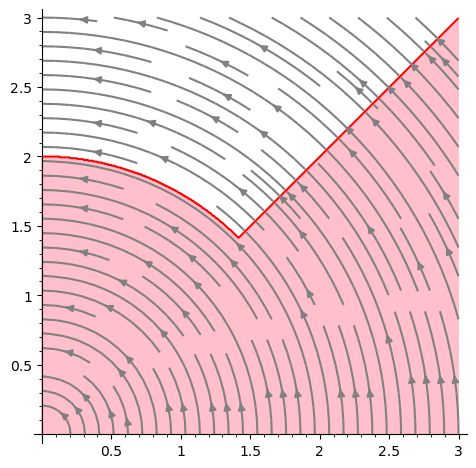

In [27]:
p = streamline_plot(tuple(system.y),(x,0,3),(y,0,3), color='grey')\
    + region_plot((lambda x, y: x^2 + y^2 < 4 or x > y),
                  (x, 0, 3),
                  (y, 0, 3),
                  incol='pink', plot_points=500, bordercol='red')
p.set_aspect_ratio(1)
p.show()

In [28]:
import concurrent.futures as futfut

In [29]:
pool = fut.ProcessPoolExecutor(1)

In [14]:
def r(_):
    return system.with_y0([RIF(0, 3), RIF(0, 3)]).reach(2*pi, step=0.8, order=15, estimation=1e-5, cutoff_threshold=1e-10, precompose_taylor_models=True)

In [31]:
reaches = pool.map(r, range(0, 1000))

calling reach with y0 = ['[0.0000000000000000 .. 3.0000000000000000]', '[0.0000000000000000 .. 3.0000000000000000]']
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x, y]
C = [0.0..3.0]
C = [0.0..3.0]
assigning system with dimension 2
resulting system has dimension 2
run within tmv args
integrationScheme = 2
calling reach with y0 = ['[0.0000000000000000 .. 3.0000000000000000]', '[0.0000000000000000 .. 3.0000000000000000]']
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x, y]
C = [0.0..3.0]
C = [0.0..3.0]
assigning system with dimension 2
resulting system has dimension 2
run within tmv args
integrationScheme = 2
calling reach with y0 = ['[0.0000000000000000 .. 3.0000000000000000]', '[0.0000000000000000 .. 3.0000000000000000]']
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x, y]
C = [0.0..3.0]
C = [0.0..3.0]
assigning system with dimension 2


In [30]:
for r in reaches:
    print(r)